# Problem Set Two - Data Science Math

## Question 1 - Load an RGB image from a URL

Importing the necesarry libraries

In [240]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve
import cv2

Specifying the URL of the image I am loading

In [241]:
cat_picture = "https://i.etsystatic.com/35132655/r/il/d4693b/4448959122/il_fullxfull.4448959122_7wb7.jpg"

Using 'requests' to fetch the image data

In [242]:
response = requests.get(cat_picture)

Checking if the request was successful (status code 200), and displaying the image using matplotlib

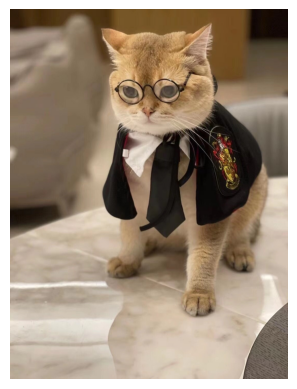

In [243]:
if response.status_code == 200:
  img = Image.open(BytesIO(response.content))
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels
  plt.show()

## Question two - Resize the image to 224x224

Resizing the image to 224x224 pixels

In [244]:
img = img.resize((224, 224))

Displaying the resized image

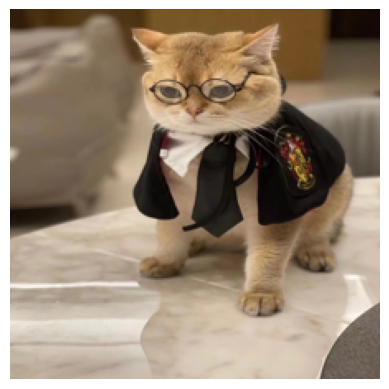

In [245]:
plt.imshow(img)
plt.axis('off')
plt.show()

## Question Three - Show a greyscale copy

Displaying the greyscale copy of the original image using the 'gray' colormap for greyscale and removing the axis labels

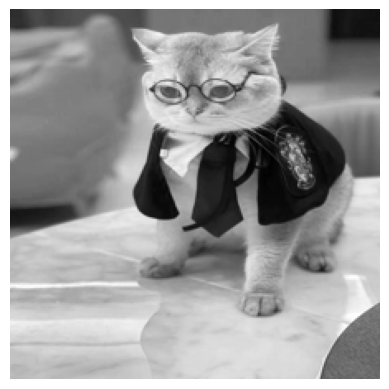

In [246]:
np_image = np.array(img)
np_image.shape[0]
greyImage = np_image[:, :, 0]

plt.imshow(greyImage, cmap='gray')
plt.axis('off')
plt.show()

## Question Four - Convolve with 10 random features and show filters and feature maps for each

Generating 10 random 3x3 filters

In [247]:
num_filters = 10
filter_size = (3, 3, 3)
filters = [np.random.rand(*filter_size) for _ in range(num_filters)]

Creating subplots to display filters and feature maps

In [248]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Define a function to generate random 3D filters

In [249]:
def generate_random_3d_filters(num_filters, filter_size, depth):
    filters = np.random.randn(num_filters, filter_size, filter_size, depth)
    return filters

Define a function to apply 3D filters to the color image and return the feature maps

In [250]:
def apply_3d_filters(image, filters):
    feature_maps = []
    for filter in filters:
        convolved = np.zeros_like(image, dtype=np.float64)
        for channel in range(depth):
            convolved[:, :, channel] = convolve(image[:, :, channel], filter[:, :, channel], mode='same')
        feature_maps.append(convolved.astype(np.uint8))
    return feature_maps

Generate 10 random 3D filters and apply them to the color image

In [251]:
num_filters = 10
filter_size = 3
depth = 3
filters = generate_random_3d_filters(num_filters, filter_size, depth)
feature_maps = apply_3d_filters(np_image, filters)

Display the filters and feature maps

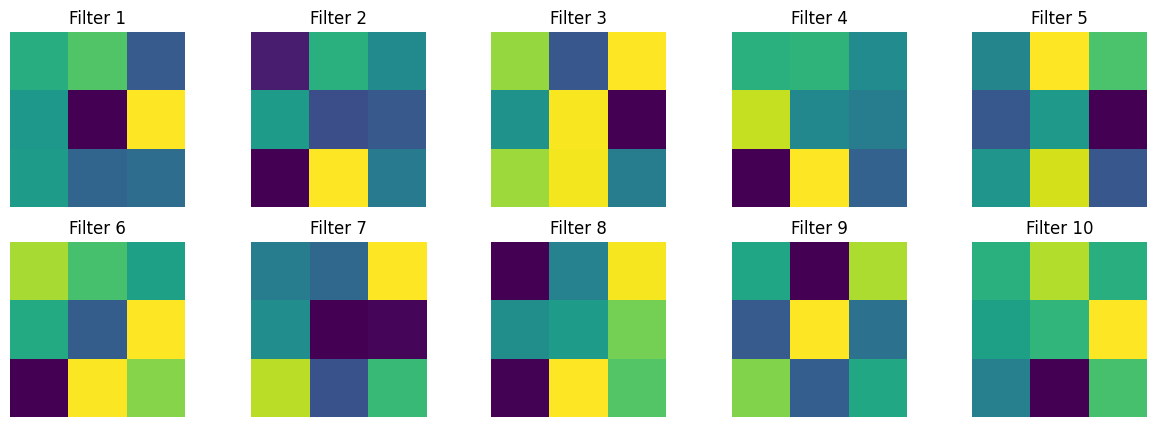

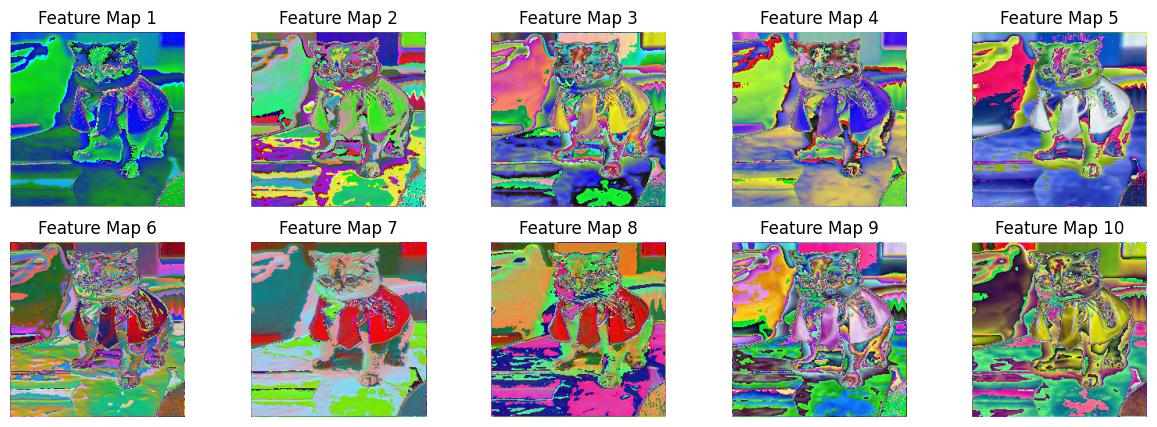

In [252]:
plt.figure(figsize=(15, 5))
for i in range(num_filters):
    plt.subplot(2, num_filters // 2, i + 1)
    plt.imshow(filters[i][:, :, 0])
    plt.title(f'Filter {i + 1}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(15, 5))
for i in range(num_filters):
    plt.subplot(2, num_filters // 2, i + 1)
    plt.imshow(feature_maps[i])
    plt.title(f'Feature Map {i + 1}')
    plt.axis('off')
plt.show()